# Signal processing course 2018/2019-1 @ ELTE
# Assignment 1
## 09.17.2018

## Task 6
### Calculating the roots of a quadratic equation

#### Cancellation
Without a guard digit (see Task 3), the relative error committed when subtracting two nearby quantities can be very large. In other words, the evaluation of any expression containing a subtraction (or an addition of quantities with opposite signs) could result in a relative error so large that all the digits are meaningless. When subtracting nearby quantities, the most significant digits in the operands match and cancel each other. There are two kinds of cancellation: catastrophic and benign.

*Catastrophic cancellation* occurs when the operands are subject to rounding errors. For example in the quadratic formula, the expression 

$$
b^{2} - 4ac
$$

occurs. The quantities $b^{2}$ and $4ac$ are subject to rounding errors since they are the results of floating-point multiplications. Suppose that they are rounded to the nearest floating-point number, and so are accurate to within 0.5 ULP (see Task 5). When they are subtracted, cancellation can cause many of the accurate digits to disappear, leaving behind mainly digits contaminated by rounding error. Hence the difference might have an error of many ULPs. For example, consider 

$$
a = 1.22
$$
$$
b = 3.34
$$
$$
c = 2.28
$$

The exact value of $b^{2} - 4ac$ is $0.0292$. But $b^{2}$ rounds to $11.2$ and $4ac$ rounds to $11.1$, hence the final answer is $0.1$ which is an error by 70 ULPs, even though $11.2 - 11.1$ is exactly equal to $0.16$. The subtraction did not introduce any error, but rather exposed the error introduced in the earlier multiplications.

*Benign cancellation* occurs when subtracting exactly known quantities. If x and y have no rounding error, then if the subtraction is done with a guard digit, the difference $x - y$ has a very small relative error (less than 2).

A formula that exhibits catastrophic cancellation can sometimes be rearranged to eliminate the problem. Consider the quadratic formula (First formula):

$$
r_{1} = \frac{-b + \sqrt{b^{2} - 4ac}}{2a}
$$
$$
r_{2} = \frac{-b - \sqrt{b^{2} - 4ac}}{2a}
$$

When $b^{2} \gg ac$, then $b^{2} - 4ac$ does not involve a cancellation and

$$
\sqrt{b^{2} - 4ac} \approx \left| b \right|
$$

But the other addition (subtraction) in one of the formulas will have a catastrophic cancellation. To avoid this, multiply the numerator and denominator of $r_{1}$ and $r_{2}$ by

$$
-b - \sqrt{b^{2} - 4ac}
$$

to obtain the Second formula:

$$
r_{1} = \frac{2c}{-b - \sqrt{b^{2} - 4ac}}
$$
$$
r_{2} = \frac{2c}{-b + \sqrt{b^{2} - 4ac}}
$$

If $b^{2} \gg ac$ and $b > 0$, then computing $r_{1}$ using the First formula will involve a cancellation. Therefore, use the Second formula for computing $r_{1}$ and the First formula for $r_{2}$. On the other hand, if $b < 0$, use the First formula for computing $r_{1}$ and the Second formula for $r_{2}$.


##### Initial variables

In [80]:
a_Quad = 1
b_Quad = -1e+08
c_Quad = 1

Write a function to calculate $r_{1}$ and $r_{2}$, wheter $b < 0$ or $b > 0$, using the two formula above.

In [81]:
def QuadSolver(a_Quad,b_Quad,c_Quad):
    
    if(b_Quad < 0):
        r_1_Quad = (-b_Quad + math.sqrt(b_Quad**2 - 4*a_Quad*c_Quad)) / (2*a_Quad)
        r_2_Quad = (2*c_Quad) / (-b_Quad + math.sqrt(b_Quad**2 - 4*a_Quad*c_Quad))
        
    else:
        r_1_Quad = (2*c_Quad) / (-b_Quad - math.sqrt(b_Quad**2 - 4*a_Quad*c_Quad))
        r_2_Quad = (-b_Quad - math.sqrt(b_Quad**2 - 4*a_Quad*c_Quad)) / (2*a_Quad)
        
    return(r_1_Quad,r_2_Quad)

In [82]:
r_1_Quad, r_2_Quad = QuadSolver(a_Quad,b_Quad,c_Quad)

print("Root #1:", r_1_Quad)
print("Root #2:", r_2_Quad)

Root #1: 100000000.0
Root #2: 1e-08


##### Check result

In [83]:
# Should be ~0
print("ax^2 + bx + c with root #1:", SmartAdd(SmartAdd(a_Quad * (r_1_Quad**2),b_Quad * r_1_Quad),c_Quad))
print("ax^2 + bx + c with root #2:", SmartAdd(SmartAdd(a_Quad * (r_2_Quad**2),b_Quad * r_2_Quad),c_Quad))

ax^2 + bx + c with root #1: 1
ax^2 + bx + c with root #2: 1.0000000000000001E-16


### True roots
Algebraically the roots would be the following:

$$
x_{1,2} = -50\ 000\ 000 \pm \sqrt{2\ 499\ 999\ 999\ 999\ 999}
$$

The non-zero digits are out of the range of the floating-point precision. The approximate value of the roots above, would be

$$
-50\ 000\ 000 + \sqrt{2\ 499\ 999\ 999\ 999\ 999} \approx -1.000000000000000100000000000000020000000000000005000 \dots \times 10^{-8}
$$

$$
-50\ 000\ 000 - \sqrt{2\ 499\ 999\ 999\ 999\ 999} \approx -9.999999999999998999999999999999899999999999999980000 \dots \times 10^{7}
$$

## Task 7
### Heron's formula

The algorithm for calculating a triangle's area is the well-known Heron's formula. It states that the area of a triangle whose sides have lengths $a$, $b$, and $c$ is

$$
A = \sqrt{s \left( s-a \right) \left( s-b \right) \left( s-c \right)}
$$

Heron's formula as given above is numerically unstable for triangles with a very small angle when using floating point arithmetic. A stable alternative involves arranging the lengths of the sides so that $a \geq b \geq c$ and computing:

$$
A = \frac{1}{4}\sqrt{ \left( a + \left( b + c \right) \right) \left( c − \left( a − b \right) \right) \left( c + \left( a − b \right) \right) \left( a + \left( b − c \right) \right)}
$$

Where

$$
s = \frac{a+b+c}{2}
$$

The brackets in the above formula are required in order to prevent numerical instability in the evaluation.

##### Set length of sides and $\left( \beta, p \right)$

In [84]:
Side_a = 9
Side_b = 4.53
Side_c = 4.53

b_p_Heron = np.array((10,3))

##### Calculate half-circumference

In [85]:
s_Heron = (Side_a + Side_b + Side_c) / 2

print("Half-circumference", s_Heron)

Half-circumference 9.030000000000001


##### Compare the two implementations of Heron's formula

In [86]:
A_1 = math.sqrt(s_Heron * (s_Heron - Side_a) * (s_Heron - Side_b) * (s_Heron - Side_c))

In [87]:
A_2 = 1/4 * math.sqrt((Side_a + (Side_b + Side_c)) * (Side_c - (Side_a - Side_b)) * (Side_c + (Side_a - Side_b)) * (Side_a + (Side_b - Side_c)))

In [88]:
print("Heron Standard:", A_1)
print("Heron Numerically corrected:", A_2)

print("\nDifference:", abs(A_2 - A_1))

Heron Standard: 2.3421624623412036
Heron Numerically corrected: 2.3421624623411685

Difference: 3.5083047578154947e-14


#### Calculating relative and absolute errors

The arrays in the form of b_p_X contains two quantities, $\beta$ and $p$ in the order of $\left( \beta,p \right)$. We use these vectors to calculate errors, using the method described in Task 5.

In [89]:
def CalcEpsRel_Heron(beta,p):
    return(1/2 * (1/beta**(abs(1-p))))

In [90]:
# Initial b_p_X
b_p_Heron = np.array((10,3))

The relative errors are always the same, because they're only depend from $\left( \beta,p \right)$

In [91]:
epsilonRel_Heron = CalcEpsRel_Heron(b_p_Heron[0],b_p_Heron[1])
print("Relative error:", epsilonRel_Heron)

Relative error: 0.005


##### First case

In [92]:
deltaAbs_Heron_1 = epsilonRel_Heron * A_1
print("Absolute error in the first case:", deltaAbs_Heron_1)

Absolute error in the first case: 0.011710812311706018


##### Second case

In [93]:
deltaAbs_Heron_2 = epsilonRel_Heron * A_2
print("Absolute error in the first case:", deltaAbs_Heron_2)

Absolute error in the first case: 0.011710812311705843


##### Difference

In [94]:
print("Difference between errors:", abs(deltaAbs_Heron_2 - deltaAbs_Heron_1))

Difference between errors: 1.7520707107365752e-16


## Task 8
### Machine epsilon

Machine epsilon by definiton:

$$
\varepsilon = \frac{1}{2} \beta^{1-p}
$$

### Octave

![64bit](img/64bit.png)

Machine epsilon in octave could be displayed by a built-in function, $eps()$, which returns, that

$$
\varepsilon = 2.220446049250313^{-16}
$$

Based on the magnitude of this value, we can say that a floating-point number's significand is stored on 64 bits, where the sign part takes up 1 bit, the exponent takes up 11 bits, and the mantis/significand takes up 52 bits. If we need to display more numbers on the left side of the comma, we will lose bits, and therefore decimal places on the right side. The precision will deteriorate in these cases for small numbers.

Note that by default numeric constants (like $\varepsilon$) are represented within Octave by IEEE 754 double precision (binary64) floating-point format.

Let's test the same for Python too.

In [95]:
print("2.220446049250313:", 2.220446049250313, "\n")

print("-2.220446049250313:", -2.220446049250313, "\n")

print("22.220446049250313:", 22.220446049250313, "\n")

print("222.220446049250313:", 222.220446049250313, "\n")

print("-222.220446049250313:", -222.220446049250313)

2.220446049250313: 2.220446049250313 

-2.220446049250313: -2.220446049250313 

22.220446049250313: 22.220446049250313 

222.220446049250313: 222.2204460492503 

-222.220446049250313: -222.2204460492503


### Python
##### Using existing libraries
Python has it's own functions too, to display machine epsilon.

In [96]:
print("float epsilon:", np.finfo(float).eps)

print("np.float32 epsilon:", np.finfo(np.float32).eps)

print("np.float64 epsilon:", np.finfo(np.float64).eps)

float epsilon: 2.220446049250313e-16
np.float32 epsilon: 1.1920929e-07
np.float64 epsilon: 2.220446049250313e-16


##### Other methods

In [97]:
def FloatEpsilon():
    # Starting value
    Epsilon = 1.0
    
    while(1.0 + Epsilon != 1.0):
        Epsilon = Epsilon / 2.0
        
    '''Last iteration will half the floating-point epsilon, and 
    returns that value, so we need to multiply with 2'''
    return(2 * Epsilon)

In [98]:
print("Floating-point epsilon:", FloatEpsilon())

Floating-point epsilon: 2.220446049250313e-16


## Task 9
### Random number generator with shift-register and XOR

The 128bit XorShift function (with period $2^{128}-1$) generates pseudo-random numbers with seeds $x,y,z,w$ in the following way in C language:

```c
u_int64 XorShift128(){
    t=(xˆ(x<<a));
    x=y;
    y=z;
    z=w;
    return w=(wˆ(w>>c))ˆ(tˆ(t>>b))
}
```

The 160bit XorShift function (with period $2^{160}-1$), which generates pseudo-random numbers with seeds $x,y,z,w,v$, could be interpreted as follows:

```c
u_int64 XorShift160(){
    t=(xˆ(x>>a));
    x=y;
    y=z;
    z=w;
    w=v;
    return v=(vˆ(v>>c))ˆ(tˆ(t>>b));
}
```

Where $\ll$ and $\gg$ operators represent left and right bitwise shifts, respectively. The $\text{^}$ operator represents the bitwise XOR. $a,b,c$ variables are carefully selected triplets. In his ["Xorshift RNGs"](https://www.jstatsoft.org/article/view/v008i14) paper in 2003, George Marsaglia described *the best* triplets, as

$$
[a,b,c]=[2,1,4],[7,13,6],[1,1,20]
$$


In [99]:
import random # For seeds

In [100]:
NbOfRNsXorShift = int(input("Amount of generated random numbers: ") or "200")

Amount of generated random numbers: 200


### XorShift128

##### Compose XorShift128 function as described above

In [101]:
def XorShift128(x_128, y_128, z_128, w_128, a_128, b_128, c_128):

    # Generate array for RNs
    RNsArrayXorShift_128 = np.empty(NbOfRNsXorShift)

    for i in range(NbOfRNsXorShift):
        # Algorithm "xor160" from p. 5 of Marsaglia, "Xorshift RNGs"
        t_128 = (x_128^(x_128<<a_128));
        x_128 = y_128;
        y_128 = z_128;
        z_128 = w_128;
        w_128 = w_128^(w_128>>c_128)
        w_128 = w_128^(t_128^(t_128>>b_128))
        RNsArrayXorShift_128[i] = w_128

    return(RNsArrayXorShift_128)

##### Define initial variables for XorShift128

In [102]:
MaxLimit_128 = 1e+08

x_128_0 = random.randrange(0,MaxLimit_128)
y_128_0 = random.randrange(0,MaxLimit_128)
z_128_0 = random.randrange(0,MaxLimit_128)
w_128_0 = random.randrange(0,MaxLimit_128)

a_128 = 7
b_128 = 13
c_128 = 6

RNsArrayXorShift_128 = XorShift128(x_128=x_128_0, y_128=y_128_0, z_128=z_128_0, w_128=w_128_0, a_128=a_128, b_128=b_128, c_128=c_128)

In [103]:
#print("Generated random numbers with XorShift128:\n", RNsArrayXorShift_128)

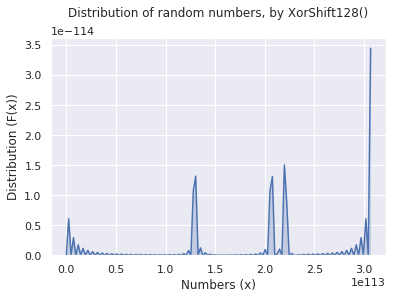

In [104]:
sns.kdeplot(RNsArrayXorShift_128, shade=True)

plt.xlabel("Numbers (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of random numbers, by XorShift128()\n")

plt.show()

### XorShift160

##### Compose XorShift160 function as described above

In [105]:
def XorShift160(x_160, y_160, z_160, w_160, v_160, a_160, b_160, c_160):

    # Generate array for RNs
    RNsArrayXorShift_160 = np.empty(NbOfRNsXorShift)

    for i in range(NbOfRNsXorShift):
        # Algorithm "xor160" from p. 5 of Marsaglia, "Xorshift RNGs"
        t_160 = (x_160^(x_160<<a_160));
        x_160 = y_160;
        y_160 = z_160;
        z_160 = w_160;
        w_160 = v_160;
        v_160 = (v_160^(v_160>>c_160))^(t_160^(t_160>>b_160));
        RNsArrayXorShift_160[i] = v_160

    return(RNsArrayXorShift_160)

##### Define initial variables for XorShift160

In [106]:
MaxLimit_160 = 1e+08

x_160_0 = random.randrange(0,MaxLimit_160)
y_160_0 = random.randrange(0,MaxLimit_160)
z_160_0 = random.randrange(0,MaxLimit_160)
w_160_0 = random.randrange(0,MaxLimit_160)
v_160_0 = random.randrange(0,MaxLimit_160)

a_160 = 7
b_160 = 13
c_160 = 6

RNsArrayXorShift_160 = XorShift160(x_160=x_160_0, y_160=y_160_0, z_160=z_160_0, w_160=w_160_0, v_160=v_160_0, a_160=a_160, b_160=b_160, c_160=c_160)

In [107]:
#print("Generated random numbers with XorShift160:\n", RNsArrayXorShift_160)

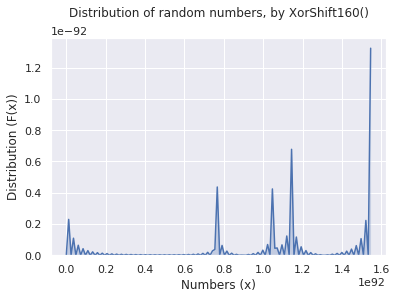

In [108]:
sns.kdeplot(RNsArrayXorShift_160, shade=True)

plt.xlabel("Numbers (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of random numbers, by XorShift160()\n")

plt.show()

### Comparing to built-in RNGs
##### Python's random.uniform() funtion

In [109]:
'''import random''';

In [110]:
RNsArrayPythonRandom = np.empty(NbOfRNsXorShift)

for i in range(NbOfRNsXorShift):
    RNsArrayPythonRandom[i] = random.uniform(0, 1e+50)

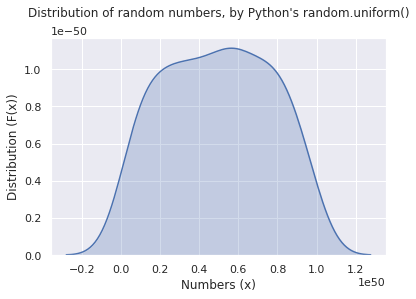

In [111]:
sns.kdeplot(RNsArrayPythonRandom, shade=True)

plt.xlabel("Numbers (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of random numbers, by Python's random.uniform()\n")

plt.show()

##### Numpy's random.rand() function

In [112]:
RNsArrayNumpyRand = np.random.rand(NbOfRNsXorShift)

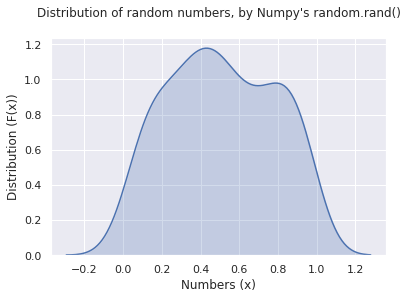

In [113]:
sns.kdeplot(RNsArrayNumpyRand, shade=True)

plt.xlabel("Numbers (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of random numbers, by Numpy's random.rand()\n")

plt.show()

##### Numpy's random.randint() finction

In [114]:
RNsArrayNumpyRandint = np.random.randint(low=0, high=1e+18, size=NbOfRNsXorShift)

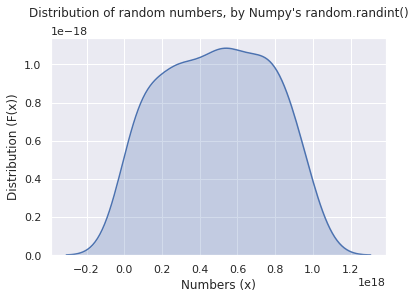

In [115]:
sns.kdeplot(RNsArrayNumpyRandint, shade=True)

plt.xlabel("Numbers (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of random numbers, by Numpy's random.randint()\n")

plt.show()

##### Numpy's random.normal() finction

In [116]:
RNsArrayNumpyNormal = np.random.normal(size=NbOfRNsXorShift)

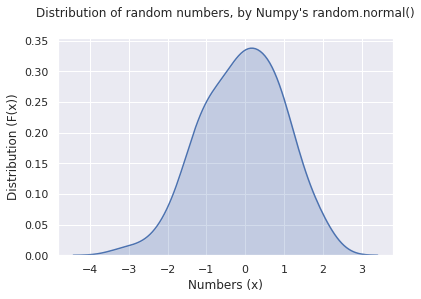

In [117]:
sns.kdeplot(RNsArrayNumpyNormal, shade=True)

plt.xlabel("Numbers (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of random numbers, by Numpy's random.normal()\n")

plt.show()

## Task 10
### Multiplicative congruential random number generator

Multiplicative congruential pseudo-random number generator, generates numbers by a recursive equation, containing 3 parameters and 1 variable, as follows:

$$
x_{i+1} = \left( a*x_{i} + b \right)\ mod\ m
$$

In [118]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

##### Initial variables

In [119]:
a = 13
b = 0
m = 150
x_0 = 1

##### Generating numbers in the $\left[ 0,1 \right]$ interval

In [120]:
def MultCongRNG(a,b,m):
    global x_0
    x_p = ((a * x_0 + b) % m) / m
    x_0 = x_p * m

    return(x_p)

In [121]:
RndNum = MultCongRNG(a,b,m)
print("Generated random number:", RndNum)

Generated random number: 0.08666666666666667


### Marsaglia's theorem/Marsaglia effect

The Marsaglia effect encapsulates the regularity, appearing in the numbers as pseudo-random numbers are generated. It was named after its descriptor, Marsaglira.
Marsaglia has shown that n-dimensional vectors, which were created by a pseudo-random generator will be located on a finite number of parallel n-dimensional surfaces, when they're represented.

To show the Marsaglia effect, we create thousands of 3-dimensional vectors, as follows:

$$
\left( x_{1}, x_{2}, x_{3} \right), \left( x_{4}, x_{5}, x_{6} \right), \left( x_{7}, x_{8}, x_{9} \right) \cdots
$$

Then we plot them on a cluster density graph, and a 2D scatter plot for demonstration.

In [122]:
DimOfMarsaglia = int(input("Please enter the dimension of examined vectors: ") or "3")

Please enter the dimension of examined vectors: 3


In [123]:
NbOfMarsaglia = int(input("Please enter the number of examined vectors: ") or "15000")

Please enter the number of examined vectors: 15000


In [124]:
MarsagliaArray = np.empty((NbOfMarsaglia, 3))

In [125]:
for i in range (NbOfMarsaglia):
    for j in range(DimOfMarsaglia):
        MarsagliaArray[i,j] = MultCongRNG(a,b,m)

In [126]:
print("Preview of the created array:\n", MarsagliaArray)

Preview of the created array:
 [[0.12666667 0.64666667 0.40666667]
 [0.28666667 0.72666667 0.44666667]
 [0.80666667 0.48666667 0.32666666]
 ...
 [0.44458957 0.77966441 0.13563733]
 [0.76328526 0.92270842 0.99520952]
 [0.93772382 0.1904097  0.47532609]]


##### 3D Scatter plot

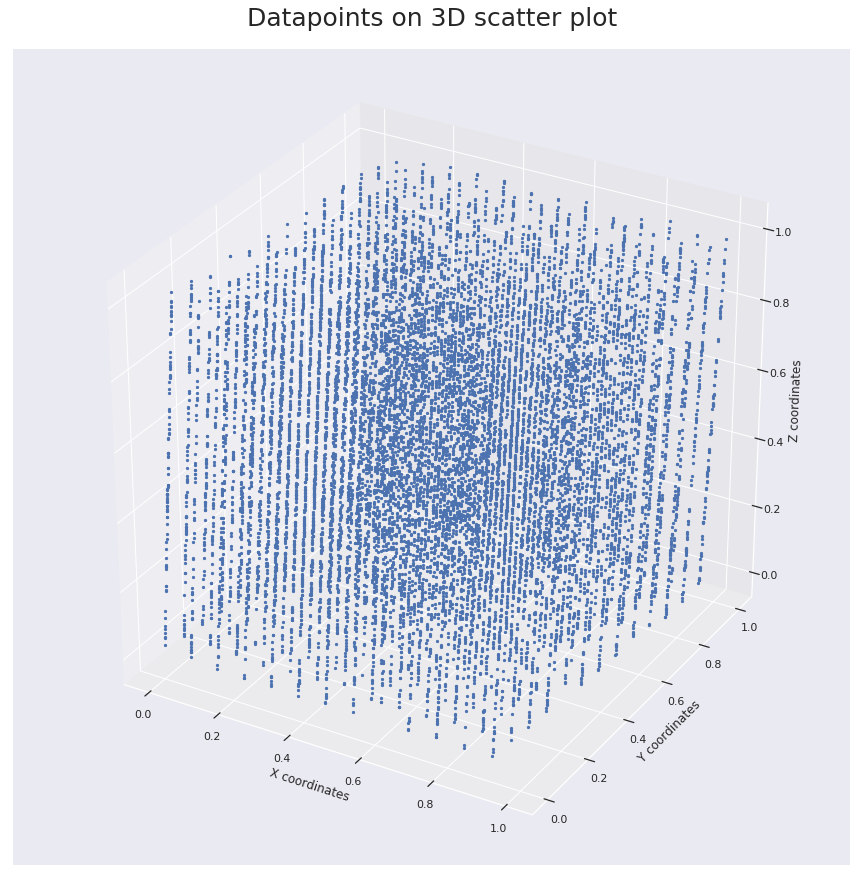

In [127]:
fig_MarsagliaScatter = plt.figure(figsize=(15,15))
ax_MarsagliaScatter = fig_MarsagliaScatter.add_subplot(111, projection='3d')

ax_MarsagliaScatter.scatter(xs=MarsagliaArray.T[0], ys=MarsagliaArray.T[1], zs=MarsagliaArray.T[2], zdir='z', s=20, c=None, depthshade=False, marker='.')
ax_MarsagliaScatter.set_xlabel("X coordinates")
ax_MarsagliaScatter.set_ylabel("Y coordinates")
ax_MarsagliaScatter.set_zlabel("Z coordinates")

plt.title("Datapoints on 3D scatter plot\n\n\n", fontsize=25)

plt.show()

It is clearly visible, that "random numbers fall mainly in the planes", as Marsaglia said!

#### Initial calculations for density plots

In [129]:
x_MarsagliaDensity = MarsagliaArray.T[0]
y_MarsagliaDensity = MarsagliaArray.T[1]
z_MarsagliaDensity = MarsagliaArray.T[2]

xyz_MarsagliaDensity = np.vstack([x_MarsagliaDensity,y_MarsagliaDensity,z_MarsagliaDensity])
density_MarsagliaDensity = stats.gaussian_kde(xyz_MarsagliaDensity)(xyz_MarsagliaDensity)

idx = density_MarsagliaDensity.argsort()
x_MarsagliaDensity, y_MarsagliaDensity, z_MarsagliaDensity, density_MarsagliaDensity = x_MarsagliaDensity[idx], y_MarsagliaDensity[idx], z_MarsagliaDensity[idx], density_MarsagliaDensity[idx]

##### 3D density plot

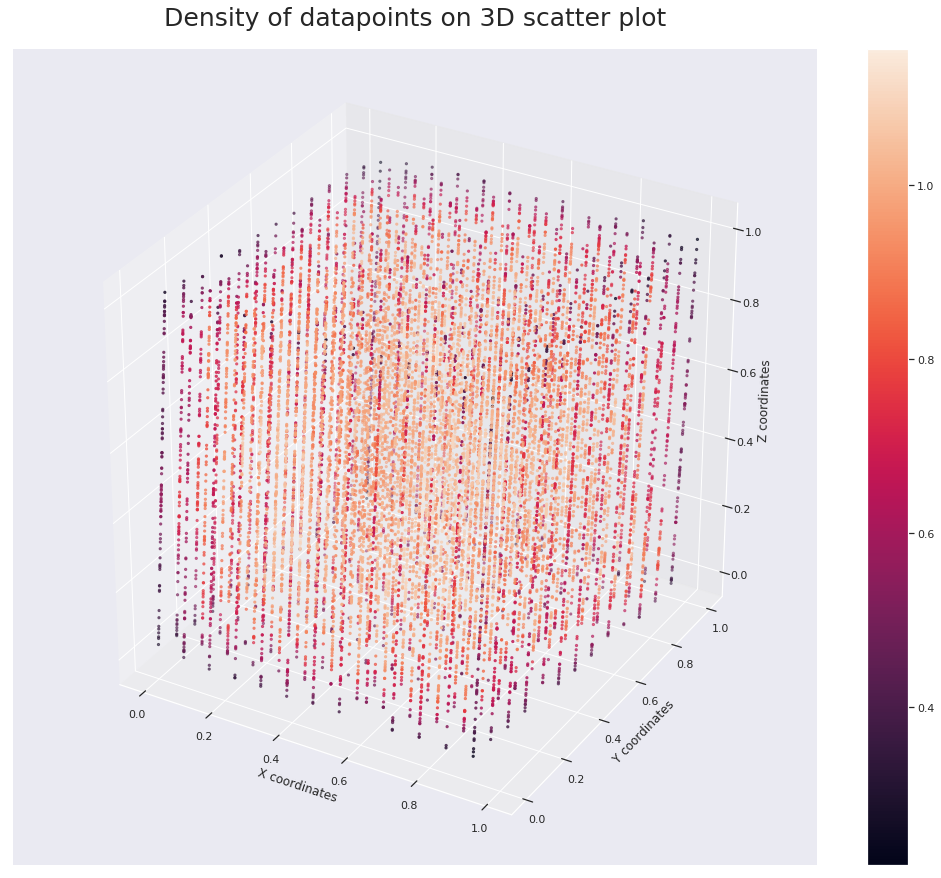

In [130]:
fig_MarsagliaDensity = plt.figure(figsize=(18,15))
ax_MarsagliaDensity = fig_MarsagliaDensity.add_subplot(111, projection='3d')

PlottedMarsagliaContour = ax_MarsagliaDensity.scatter(x_MarsagliaDensity, y_MarsagliaDensity, z_MarsagliaDensity, c=density_MarsagliaDensity, marker='.')
ax_MarsagliaDensity.set_xlabel("X coordinates")
ax_MarsagliaDensity.set_ylabel("Y coordinates")
ax_MarsagliaDensity.set_zlabel("Z coordinates")

plt.title("Density of datapoints on 3D scatter plot\n\n\n", fontsize=25)

fig_MarsagliaDensity.colorbar(PlottedMarsagliaContour)

plt.show()

#### 2D scatter along axes

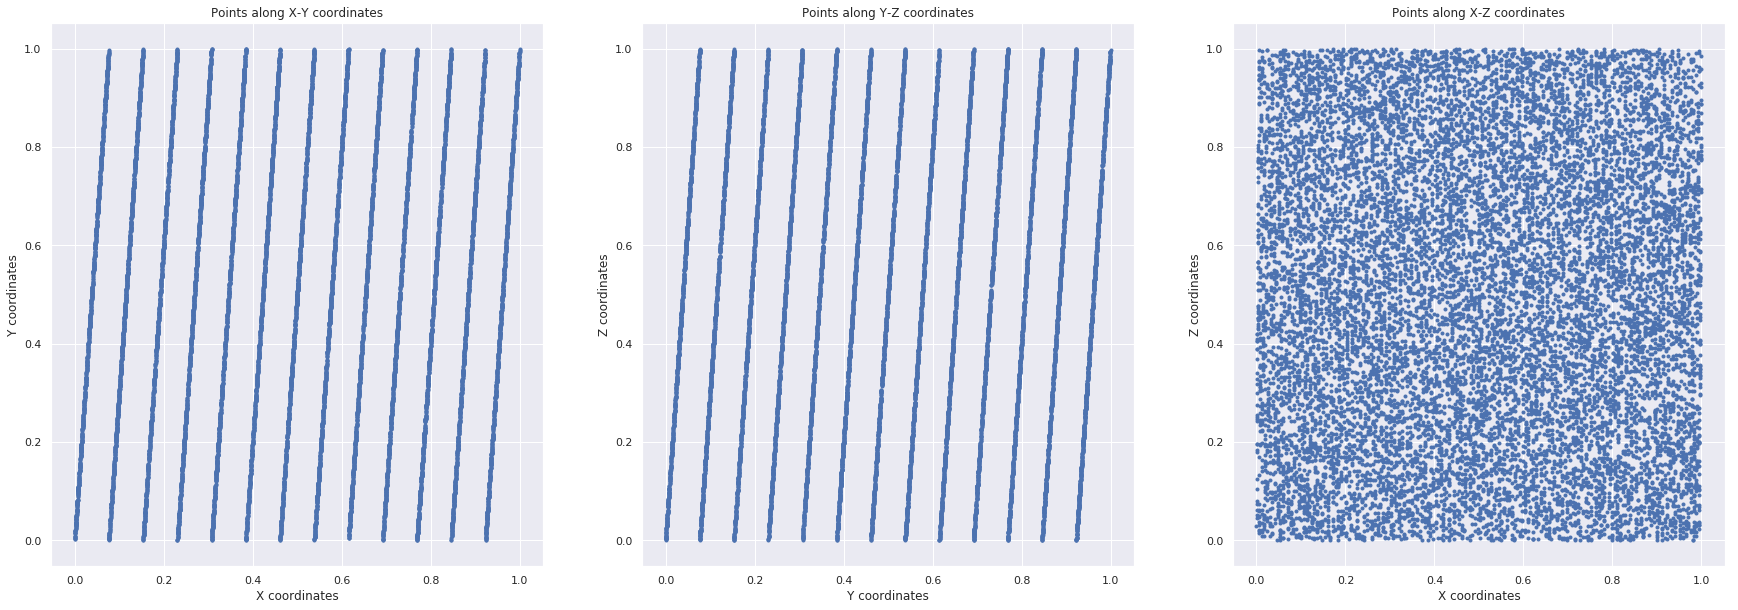

In [131]:
fig_RandomDeepContour = plt.figure(figsize=(30,10))
ax_MarsagliaContour_XY, ax_MarsagliaContour_YZ, ax_MarsagliaContour_XZ = fig_RandomDeepContour.subplots(1, 3)

ax_MarsagliaContour_XY.scatter(MarsagliaArray.T[0], MarsagliaArray.T[1], marker='.')
ax_MarsagliaContour_YZ.scatter(MarsagliaArray.T[1], MarsagliaArray.T[2], marker='.')
ax_MarsagliaContour_XZ.scatter(MarsagliaArray.T[0], MarsagliaArray.T[2], marker='.')

ax_MarsagliaContour_XY.set_xlabel("X coordinates")
ax_MarsagliaContour_XY.set_ylabel("Y coordinates")
ax_MarsagliaContour_XY.set_title("Points along X-Y coordinates")

ax_MarsagliaContour_YZ.set_xlabel("Y coordinates")
ax_MarsagliaContour_YZ.set_ylabel("Z coordinates")
ax_MarsagliaContour_YZ.set_title("Points along Y-Z coordinates")

ax_MarsagliaContour_XZ.set_xlabel("X coordinates")
ax_MarsagliaContour_XZ.set_ylabel("Z coordinates")
ax_MarsagliaContour_XZ.set_title("Points along X-Z coordinates")

plt.show()